  
<h3 style="color:red  ;">Objectif du problème:

On souhaite modéliser la variable d’entrée « Distance_to_next_car  », représentant la 
distance séparant un véhicule du suivant.</h3>   

<h3 style="color:pink  ;">Objectif du problème:

On souhaite modéliser la variable d’entrée « Distance_to_next_car  », représentant la 
distance séparant un véhicule du suivant.</h3>  


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

distance = np.arange(0, 31, 0.1)


In [3]:
v_small = fuzz.trapmf(distance, [0, 0, 2, 5])
small = fuzz.trimf(distance, [3, 7, 11])
perfect = fuzz.trimf(distance, [9, 13, 17])
big = fuzz.trimf(distance, [15, 20, 25])
v_big = fuzz.trapmf(distance, [23, 26, 30, 30])


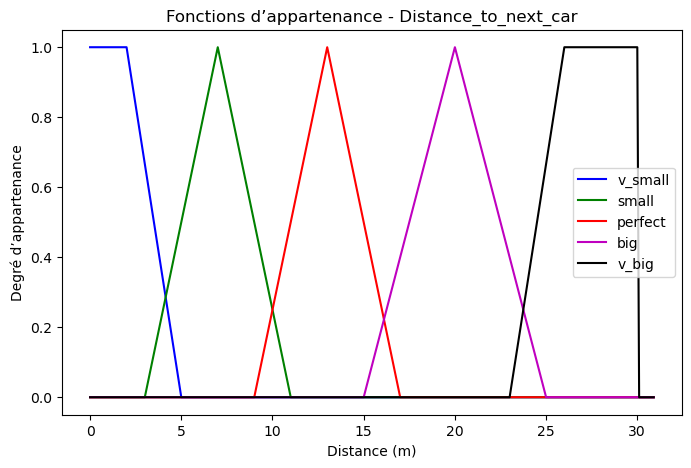

In [7]:
plt.figure(figsize=(8,5))
plt.plot(distance, v_small, 'b', label='v_small')
plt.plot(distance, small, 'g', label='small')
plt.plot(distance, perfect, 'r', label='perfect')
plt.plot(distance, big, 'm', label='big')
plt.plot(distance, v_big, 'k', label='v_big')
plt.title('Fonctions d’appartenance - Distance_to_next_car')
plt.xlabel('Distance (m)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.show()


<h3 style="color:pink  ;">Objectif du problème

On veut modéliser une variable floue d’entrée appelée Speed_change,
qui indique comment la vitesse du véhicule change entre deux instants</h3>

In [10]:
speed = np.arange(-20, 21, 0.1)


In [12]:
declining = fuzz.trimf(speed, [-20, -10, -2])
constant = fuzz.trapmf(speed, [-5, -2, 2, 5])
growing = fuzz.trimf(speed, [2, 10, 20])


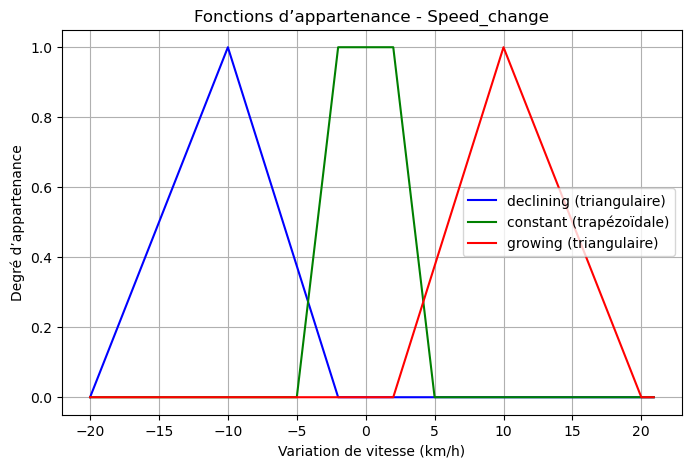

In [14]:
plt.figure(figsize=(8,5))
plt.plot(speed, declining, 'b', label='declining (triangulaire)')
plt.plot(speed, constant, 'g', label='constant (trapézoïdale)')
plt.plot(speed, growing, 'r', label='growing (triangulaire)')
plt.title('Fonctions d’appartenance - Speed_change')
plt.xlabel('Variation de vitesse (km/h)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:pink  ;">Objectif du problème:

on 
souhaite modéliser la variable de sortie « Acceleration_Adjust  », représentant 
l’ajustement de l’accélération du véhicule à appliquer selon les conditions de conduite. </h3>   

In [19]:
accel = np.arange(-3, 3.1, 0.1)


In [23]:
acc_neg_big   = fuzz.trapmf(accel, [-3, -3, -2, -1])   
acc_neg_small = fuzz.trimf(accel, [-2, -1,  0])        
acc_zero      = fuzz.trimf(accel, [-0.5, 0, 0.5])      # aucune variation
acc_pos_small = fuzz.trimf(accel, [ 0,  1,  2])        
acc_pos_big   = fuzz.trapmf(accel, [ 1,  2,  3,  3])   


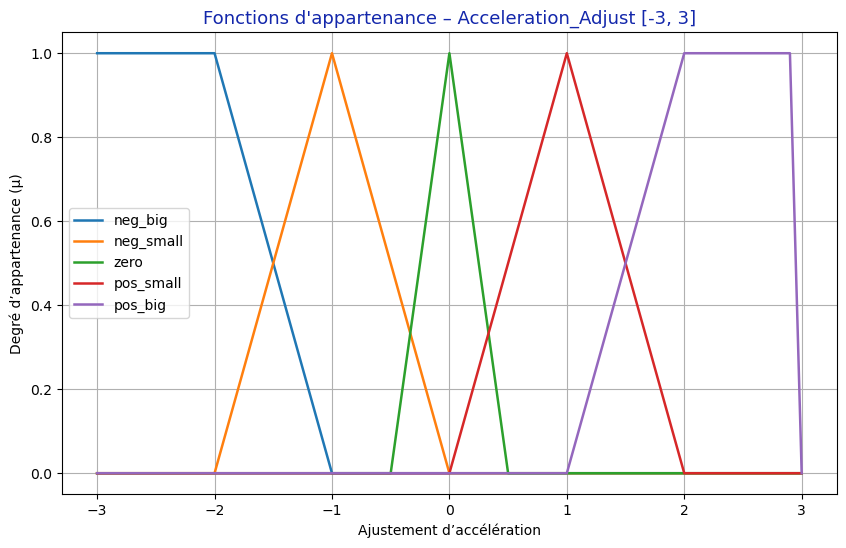

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(accel, acc_neg_big,   linewidth=1.8, label='neg_big')
plt.plot(accel, acc_neg_small, linewidth=1.8, label='neg_small')
plt.plot(accel, acc_zero,      linewidth=1.8, label='zero')
plt.plot(accel, acc_pos_small, linewidth=1.8, label='pos_small')
plt.plot(accel, acc_pos_big,   linewidth=1.8, label='pos_big')

plt.title("Fonctions d'appartenance – Acceleration_Adjust [-3, 3]", fontsize=13, color="#1327AB")
plt.xlabel("Ajustement d’accélération")
plt.ylabel("Degré d’appartenance (μ)")
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color:pink  ;">Objectif du problème:

 on 
souhaite maintenant établir la base de règles floues et simuler le comportement du système 
de régulation de vitesse.  </h3>

In [31]:
import skfuzzy.control as ctrl

In [33]:
distance = ctrl.Antecedent(np.arange(0, 31, 0.1), 'Distance_to_next_car')
speed = ctrl.Antecedent(np.arange(-20, 21, 0.1), 'Speed_change')
accel = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

In [35]:
distance['v_small'] = fuzz.trapmf(distance.universe, [0, 0, 2, 5])
distance['small'] = fuzz.trimf(distance.universe, [3, 7, 11])
distance['perfect'] = fuzz.trimf(distance.universe, [9, 13, 17])
distance['big'] = fuzz.trimf(distance.universe, [15, 20, 25])
distance['v_big'] = fuzz.trapmf(distance.universe, [23, 26, 30, 30])

speed['declining'] = fuzz.trapmf(speed.universe, [-20, -20, -10, -2])
speed['constant'] = fuzz.trimf(speed.universe, [-5, 0, 5])
speed['growing'] = fuzz.trapmf(speed.universe, [2, 10, 20, 20])

accel['neg_big'] = fuzz.trapmf(accel.universe, [-3, -3, -2.5, -1.5])
accel['neg_small'] = fuzz.trimf(accel.universe, [-2, -1, 0])
accel['zero'] = fuzz.trimf(accel.universe, [-0.5, 0, 0.5])
accel['pos_small'] = fuzz.trimf(accel.universe, [0, 1, 2])
accel['pos_big'] = fuzz.trapmf(accel.universe, [1.5, 2.2, 3, 3])

In [39]:
rule1 = ctrl.Rule(distance['v_small'] & speed['declining'], accel['neg_small'])
rule2 = ctrl.Rule(distance['v_small'] & speed['constant'], accel['neg_big'])
rule3 = ctrl.Rule(distance['v_small'] & speed['growing'], accel['neg_big'])
rule4 = ctrl.Rule(distance['small'] & speed['declining'], accel['zero'])
rule5 = ctrl.Rule(distance['small'] & speed['constant'], accel['neg_small'])
rule6 = ctrl.Rule(distance['small'] & speed['growing'], accel['neg_big'])
rule7 = ctrl.Rule(distance['perfect'] & speed['declining'], accel['pos_small'])
rule8 = ctrl.Rule(distance['perfect'] & speed['constant'], accel['zero'])
rule9 = ctrl.Rule(distance['perfect'] & speed['growing'], accel['neg_small'])
rule10 = ctrl.Rule(distance['big'] & speed['declining'], accel['pos_big'])
rule11 = ctrl.Rule(distance['big'] & speed['constant'], accel['pos_small'])
rule12 = ctrl.Rule(distance['big'] & speed['growing'], accel['zero'])
rule13 = ctrl.Rule(distance['v_big'] & speed['declining'], accel['pos_big'])
rule14 = ctrl.Rule(distance['v_big'] & speed['constant'], accel['pos_big'])
rule15 = ctrl.Rule(distance['v_big'] & speed['growing'], accel['pos_small'])


Résultat Acceleration_Adjust = 0.244


C:\Users\Khadi\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


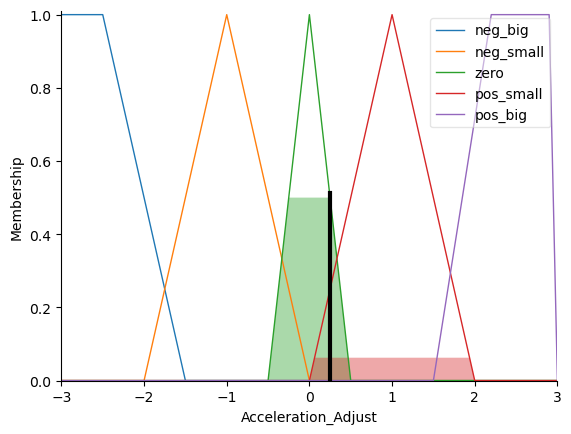

In [41]:
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                             rule7, rule8, rule9, rule10, rule11, rule12,
                             rule13, rule14, rule15])

sim = ctrl.ControlSystemSimulation(system)
sim.input['Distance_to_next_car'] = 13
sim.input['Speed_change'] = -2.5
sim.compute()

print("Résultat Acceleration_Adjust =", round(sim.output['Acceleration_Adjust'], 3))
accel.view(sim=sim)
